In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
#Data = np.loadtxt('MokuThreeCornerHatPhasemeter_20190607_155107_ASD.txt')
Data = np.loadtxt('MokuThreeCornerHatPhasemeter_20190607_165151_ASD.txt')

In [3]:
ASDDict = {}
ASDDict['Wenzel Crystal on Moku'] = Data[:,1]
ASDDict['Marconi on Moku'] = Data[:,2]
ASDDict['Difference between Wenzel Crystal and Marconi on Moku'] = Data[:,3]
ff = Data[:,0]

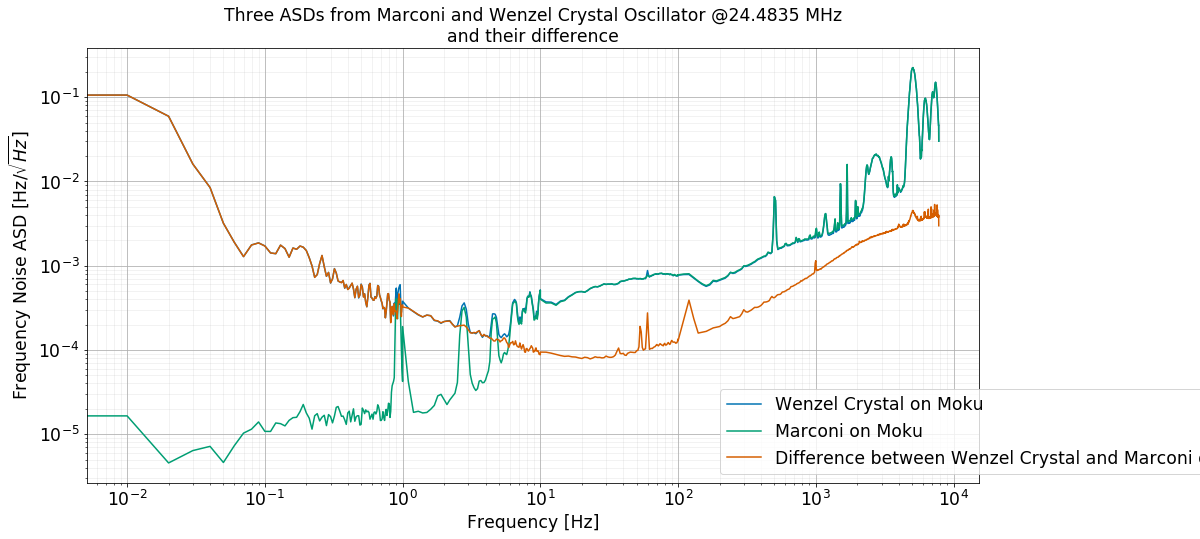

In [4]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,asd in ASDDict.items():
    plt.loglog(ff,asd,label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Three ASDs from Marconi and Wenzel Crystal Oscillator @24.4835 MHz\nand their difference')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [5]:
ASDDict2 = {}
ASDDict2['Wenzel Crystal'] = np.sqrt(Data[:,1]**2 + Data[:,3]**2 - Data[:,2]**2)
ASDDict2['Marconi'] = np.sqrt(Data[:,2]**2 + Data[:,3]**2 - Data[:,1]**2)
ASDDict2['Moku'] = np.sqrt(Data[:,1]**2 + Data[:,2]**2 - Data[:,3]**2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [6]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,asd in ASDDict2.items():
    plt.loglog(ff,asd,label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Three corner hat method impemented\nFrequency noise of the three instruments')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


In [7]:
MarconiData1 = np.loadtxt('../20190117_Marconi_PLL_Noise/Marconi539_500Hz_0_17-01-2019_165744.txt')
MarconiData2 = np.loadtxt('../20190117_Marconi_PLL_Noise/Marconi539_500Hz_1_17-01-2019_165904.txt')
MarconiData = np.concatenate((MarconiData1,MarconiData2[100:,:]))
MarconiData[:,1] = MarconiData[:,1]*500 #Multiplying by actuation slope to convert into frequency noise ASD
Data4 = np.interp(ff, MarconiData[:,0], MarconiData[:,1]) #Interpolate to same frequency axis

In [8]:
ASDDict3 = {}
ASDDict3['Wenzel Crystal on Moku'] = Data[:,1]
ASDDict3['Marconi on Moku'] = Data[:,2]
ASDDict3['Wenzel Crystal on Marconi [CTN:2286]'] = Data4

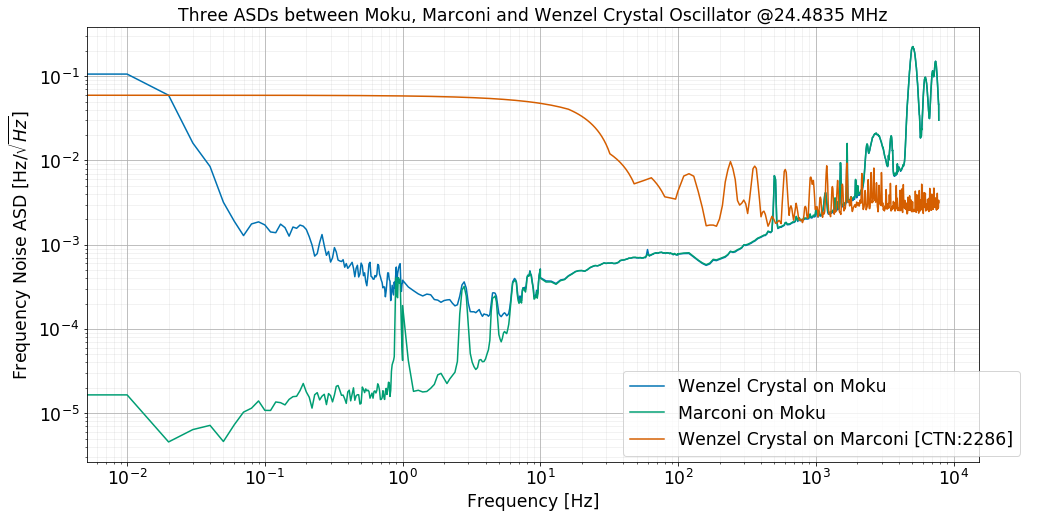

In [9]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,asd in ASDDict3.items():
    plt.loglog(ff,asd,label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('Three ASDs between Moku, Marconi and Wenzel Crystal Oscillator @24.4835 MHz')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [10]:
ASDDict4 = {}
ASDDict4['Wenzel Crystal'] = np.sqrt(Data[:,1]**2 + Data4**2 - Data[:,2]**2)
ASDDict4['Marconi'] = np.sqrt(Data[:,2]**2 + Data4**2 - Data[:,1]**2)
ASDDict4['Moku'] = np.sqrt(Data[:,1]**2 + Data[:,2]**2 - Data4**2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


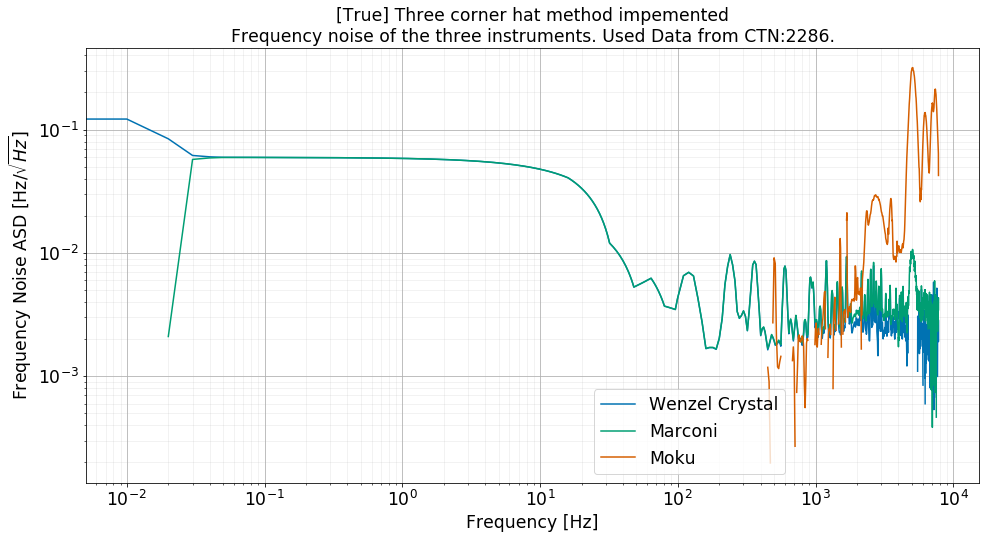

In [11]:
fig = plt.figure(figsize=[16,8])
ii=0
for key,asd in ASDDict4.items():
    plt.loglog(ff,asd,label=key,c=cList[ii])
    ii=ii+1
fig.gca().set_xlabel('Frequency [Hz]')
fig.gca().set_ylabel('Frequency Noise ASD [Hz/$\sqrt{Hz}$]')
fig.gca().set_title('[True] Three corner hat method impemented\nFrequency noise of the three instruments. Used Data from CTN:2286.')
fig.legend(loc=(0.6,0.12))
fig.gca().grid('on', which='both')
fig.gca().grid(alpha=0.2, which='minor')
figlist += [fig]

In [12]:
pp = PdfPages('MokuFreqAnalysis3CorHat_Run2.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000
